<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

--2023-04-12 15:44:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.214.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   167MB/s    in 0.4s    

2023-04-12 15:44:53 (167 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import zipfile

In [23]:
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()


base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [24]:
#labels for training
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
#labels for test
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [25]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


In [27]:
# Load time series data from a CSV file
df = pd.read_csv('/content/drive/MyDrive/DA/Electric_Production.csv')

In [28]:
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [29]:
# Convert the date column to a datetime data type
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [30]:
# Set the date column as the index of the DataFrame
df.set_index('DATE', inplace=True)
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


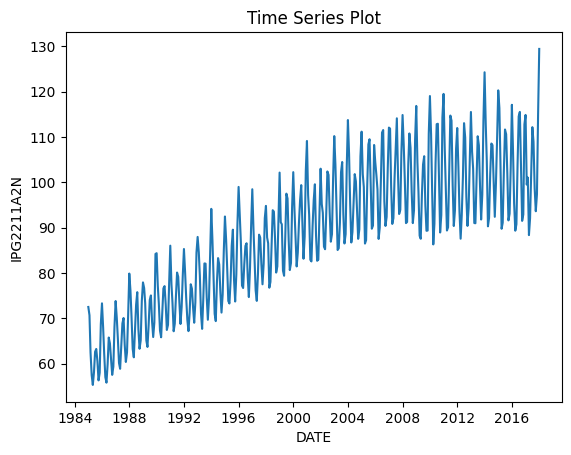

In [31]:

# Plot the time series
plt.plot(df.index, df['IPG2211A2N'])

# Add labels and title to the plot
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N')
plt.title('Time Series Plot')

# Show the plot
plt.show()


## Time Series Anaysis using Arima

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
DF = pd.read_csv('/content/drive/MyDrive/DA/Electric_Production.csv')

In [34]:
DF = DF.rename(columns={"DATE":'ds' , "IPG2211A2N":"ts"})

In [35]:
DF.head()

,ds,ts
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


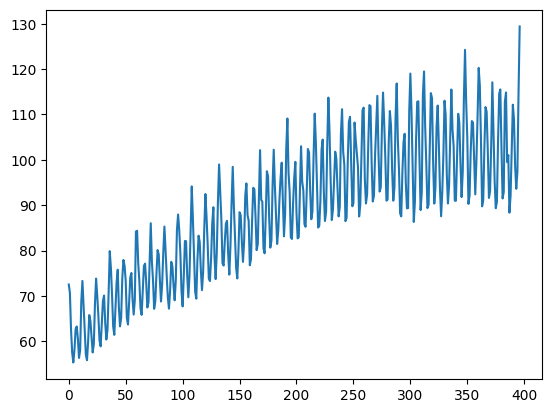

In [36]:
plt.figure()
plt.plot(DF.ts)

In [37]:
def log_trans(df , ts) : return df[ts].apply(lambda x:np.log(x))

In [38]:
DF['ts_log'] = log_trans(DF , 'ts')

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
# decomposition = seasonal_decombpose(DF['ts_log'], period = 48 , extrapolate_trend = 1)

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(DF['ts_log'], period=48, extrapolate_trend=1)

In [41]:
def plot_decomposition(df, ts, trend,seasonal, residual):
  f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,5), sharex=True )

  ax1.plot(df[ts], label="Original")
  ax1.legend(loc='best')
  ax1.tick_params(axis ='x', rotation=45)

  ax2.plot(df[trend], label="Trend")
  ax2.legend(loc='best')
  ax2.tick_params(axis ='x', rotation=45)

  ax3.plot(df[seasonal], label="Seasonal")
  ax3.legend(loc='best')
  ax3.tick_params(axis ='x', rotation=45)

  ax4.plot(df[residual], label="Residuals")
  ax4.legend(loc='best')
  ax4.tick_params(axis ='x', rotation=45)

  plt.tight_layout()
  plt.show()

In [42]:
New_DF =DF

In [43]:
New_DF.loc[:,'trend'] = decomposition.trend
New_DF.loc[:,'seasonal'] = decomposition.seasonal
New_DF.loc[:,'residuals'] = decomposition.resid

In [44]:
New_DF

,ds,ts,ts_log,trend,seasonal,residuals
0,1/1/1985,72.5052,4.283658,4.133735,0.138884,0.011040
1,2/1/1985,70.6720,4.258049,4.135335,0.058420,0.064295
2,3/1/1985,62.4502,4.134369,4.136935,0.005165,-0.007731
3,4/1/1985,57.4714,4.051287,4.138535,-0.108258,0.021010
4,5/1/1985,55.3151,4.013046,4.140136,-0.120782,-0.006308
...,...,...,...,...,...,...
392,9/1/2017,98.6154,4.591227,4.631649,-0.036022,-0.004399
393,10/1/2017,93.6137,4.539177,4.631768,-0.104301,0.011710
394,11/1/2017,97.3359,4.578168,4.631888,-0.071174,0.017454
395,12/1/2017,114.7212,4.742505,4.632007,0.087002,0.023496


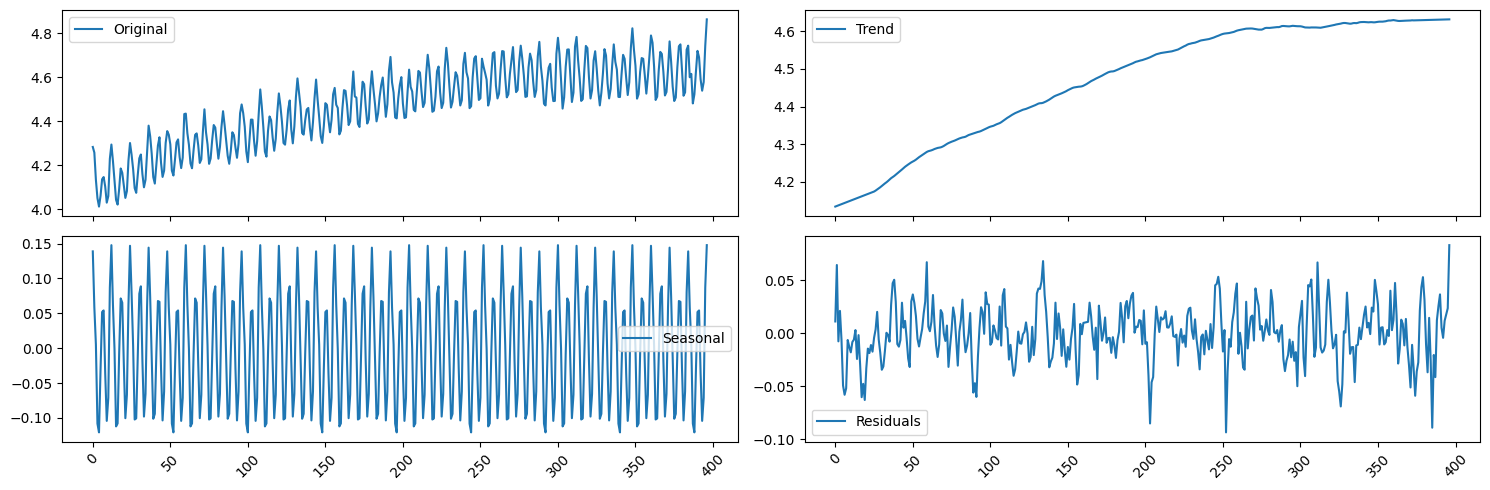

In [45]:
plot_decomposition(New_DF, ts = 'ts_log' , trend = 'trend' , seasonal = 'seasonal' , residual = 'residuals')

Test for Stationarity - Dickey Fuller

In [46]:
# Testing if we use the right moment to do the decomposition

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
dftest = adfuller(New_DF['residuals'], autolag='AIC')

In [49]:
def test_stationarity(df, ts):

  rolmean = df[ts].rolling(window=12, center= False).mean()
  rolstd =  df[ts].rolling(window=12, center = False).std()

  orig = plt.plot(df[ts], color = 'blue', label ="Original")
  mean = plt.plot(rolmean, color ='red', label ="Rolling Mean")
  std = plt.plot(rolstd, color='black', label ="Rolling Std")
  plt.legend(loc = 'best')
  plt.title("Rolling Mean and Standard Deviation for  %s" %(ts))
  plt.xticks(rotation =45)
  plt.show(block = False)
  plt.close

  print('Results:')
  dftest = adfuller(df[ts], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=["Test Statistic",'p=value','# Lasgs Used',' Number of Observations'])

  for key, value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key]= value

  print(dfoutput)

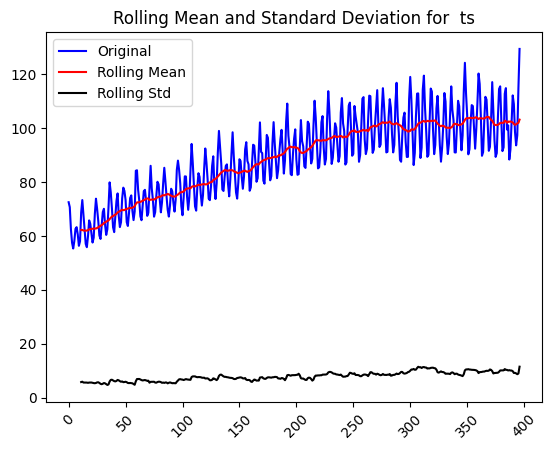

Results:
Test Statistic              -2.256990
p=value                      0.186215
# Lasgs Used                15.000000
 Number of Observations    381.000000
Critical Value(1%)          -3.447631
Critical Value(5%)          -2.869156
Critical Value(10%)         -2.570827
dtype: float64


In [50]:
test_stationarity(df = DF , ts = 'ts')

The fact that the P=value is above 0.05 shows us this is not stationary

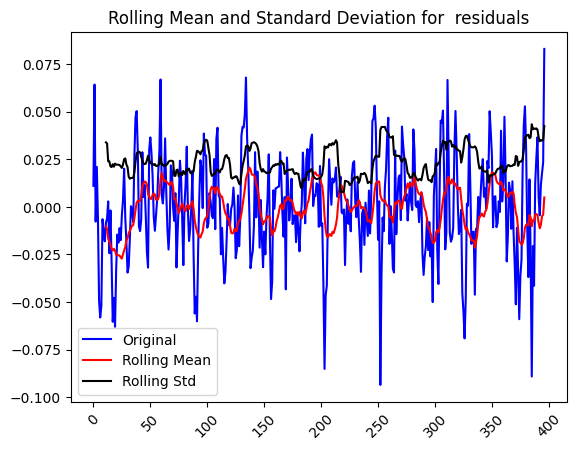

Results:
Test Statistic              -5.309599
p=value                      0.000005
# Lasgs Used                15.000000
 Number of Observations    381.000000
Critical Value(1%)          -3.447631
Critical Value(5%)          -2.869156
Critical Value(10%)         -2.570827
dtype: float64


In [51]:
test_stationarity(New_DF , 'residuals')

Good decompsiion and good lags used

Autocorrelation plots , ACF and PACF Partial 

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


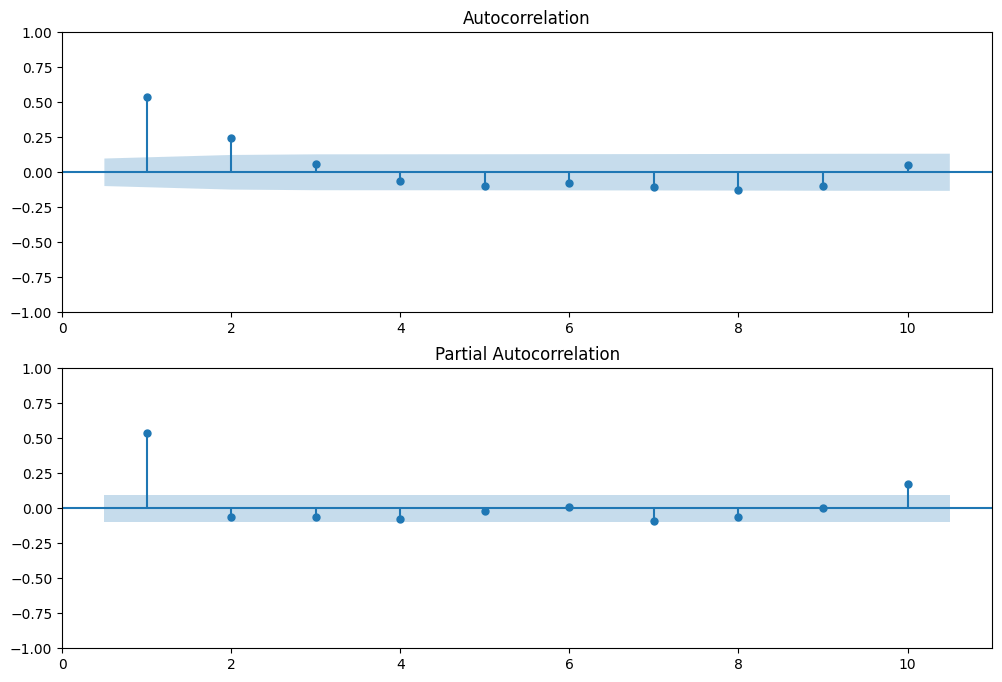

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF of df
plot_acf(New_DF['residuals'], lags=10, zero=False, ax=ax1);

# Plot the PACF of df
plot_pacf(New_DF['residuals'], lags=10, zero=False, ax=ax2);

#Forcasting using Autocorrelated Integrated moving average(ARIMA)

In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
def run_Arima(df , ts , p,d,q): # we will talk about p,d and q
  model = ARIMA(df[ts], order = (p,d,q))
  results_arima = model.fit()


  len_results = len(results_arima.fittedvalues)
  ts_modified = df[ts][-len_results:]

  rss = sum((results_arima.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss / len(df[ts]))
  print("RMSE: " , rmse)


  plt.figure()
  plt.plot(df[ts])
  plt.plot(results_arima.fittedvalues, color = 'red')
  plt.show()

  return results_arima


In [55]:
New_DF = New_DF.fillna(value = 0)

RMSE:  0.020883510549610254


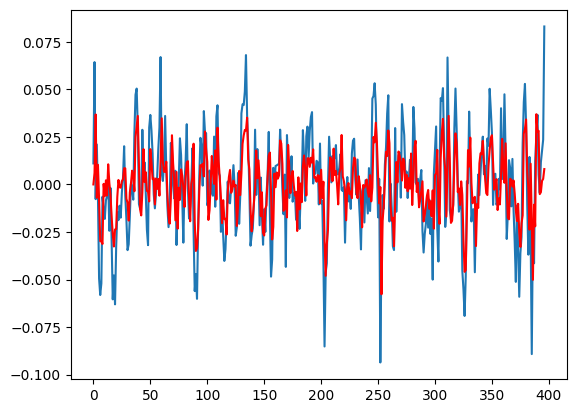

In [56]:
model_AR = run_Arima(df = New_DF , ts = 'residuals' , p = 15 , d=0  , q= 0)

In [57]:
my_forcast = model_AR.forecast(23)

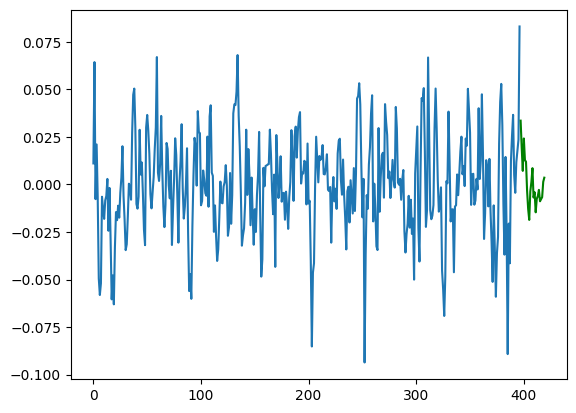

In [58]:
plt.figure()
plt.plot(New_DF['residuals'])
plt.plot(my_forcast  , color= 'green')

## Image Augmentation and

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 20
IMG_SHAPE = 150

In [61]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes =axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [62]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [63]:
train_data_gen = image_gen_train.flow_from_directory(
    batch_size = BATCH_SIZE,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [64]:
augmented_Images = [train_data_gen[0][0][0] for i in range(5)]

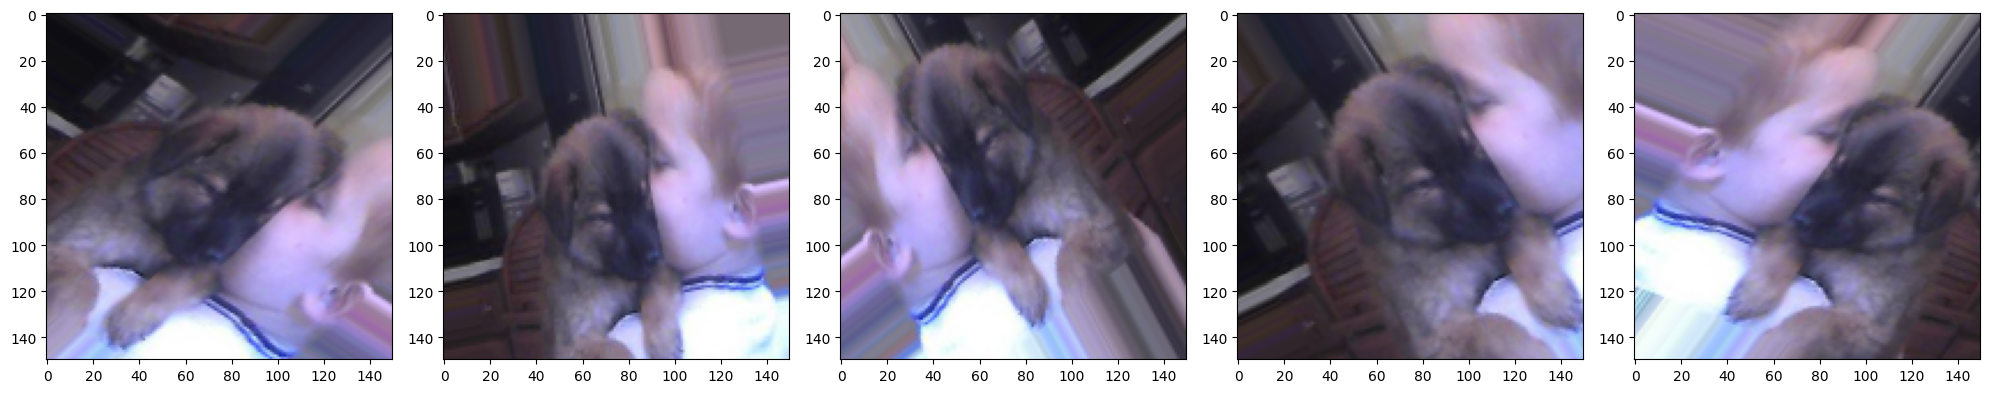

In [65]:
plotImages(augmented_Images)

In [66]:
image_gen_val= ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_SHAPE,IMG_SHAPE),
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


### Transfer Learning using Vgg16

In [67]:
from keras.applications import vgg16
import tensorflow as tf
import keras

In [68]:
INPUT_SHAPE = (150,150,3)

In [69]:
vgg = vgg16.VGG16(include_top= False , weights= 'imagenet', input_shape= INPUT_SHAPE)

58889256/58889256 [==============================] - 0s 0us/step


In [70]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [71]:
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout , InputLayer

In [72]:
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras import Model

In [73]:
output = vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
vgg_model = Model(vgg.input , output)
vgg_model.trainable = False
for layer in vgg_model.layers:
  layer.trainable = False
  

In [74]:
from matplotlib.cbook import flatten
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 8192)              14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [76]:
from tensorflow.keras.optimizers import RMSprop

In [77]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer= RMSprop(learning_rate=0.005),
    metrics = ['accuracy']
)

In [78]:
from keras.api._v2.keras import callbacks
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

In [79]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = 100,
    epochs=30,
    validation_data= val_data_gen,
    validation_steps = 10,
    callbacks = [callback],
    verbose= 2
)

Epoch 1/30


KeyboardInterrupt: ignored

##  Time Series using FB Prophet

In [ ]:
!pip install pystan==2.19.1.1 --quiet
!pip install fbprophet --quiet
!pip install yfinance --quiet

In [80]:
from fbprophet import Prophet
import datetime

In [108]:
pro_df = New_DF.filter(['ds', 'ts']).copy()

In [102]:
New_DF

,ds,ts,ts_log,trend,seasonal,residuals
0,1/1/1985,72.5052,4.283658,4.133735,0.138884,0.011040
1,2/1/1985,70.6720,4.258049,4.135335,0.058420,0.064295
2,3/1/1985,62.4502,4.134369,4.136935,0.005165,-0.007731
3,4/1/1985,57.4714,4.051287,4.138535,-0.108258,0.021010
4,5/1/1985,55.3151,4.013046,4.140136,-0.120782,-0.006308
...,...,...,...,...,...,...
392,9/1/2017,98.6154,4.591227,4.631649,-0.036022,-0.004399
393,10/1/2017,93.6137,4.539177,4.631768,-0.104301,0.011710
394,11/1/2017,97.3359,4.578168,4.631888,-0.071174,0.017454
395,12/1/2017,114.7212,4.742505,4.632007,0.087002,0.023496


In [104]:
pro_df

<bound method NDFrame.copy of             ds        ts
0     1/1/1985   72.5052
1     2/1/1985   70.6720
2     3/1/1985   62.4502
3     4/1/1985   57.4714
4     5/1/1985   55.3151
..         ...       ...
392   9/1/2017   98.6154
393  10/1/2017   93.6137
394  11/1/2017   97.3359
395  12/1/2017  114.7212
396   1/1/2018  129.4048

[397 rows x 2 columns]>

In [109]:
pro_df = pro_df.rename(columns = {'ds':'ds','ts':'y'})

In [110]:
pro_df ['ts'] = pd.to_datetime(pro_df['ds'], dayfirst = False)

In [111]:
model = Prophet(changepoint_prior_scale= 3)
model.fit(pro_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [112]:
#future_Data = model.make_future_dataframe(periods = 23)
future_Data = model.make_future_dataframe(periods = 365)

In [115]:
forecasts = model.predict(future_Data)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


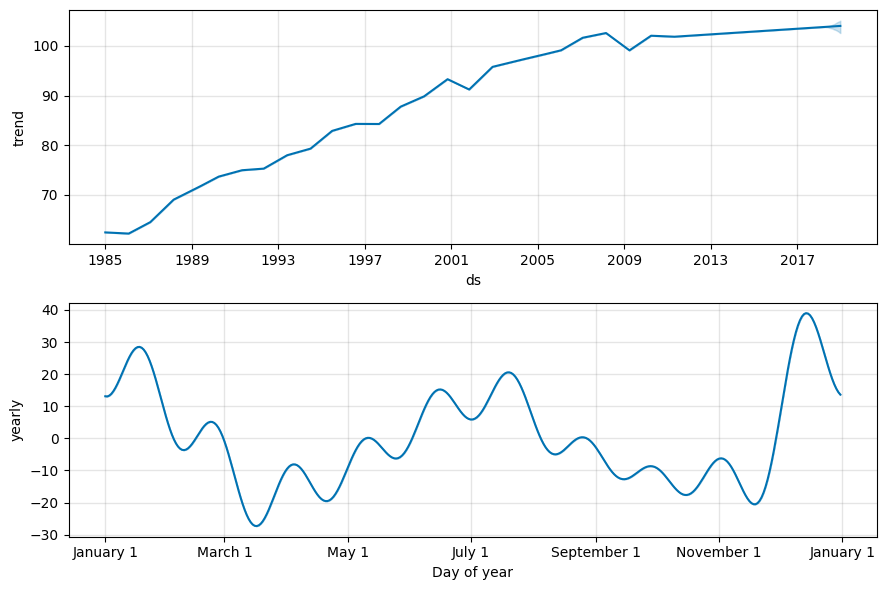

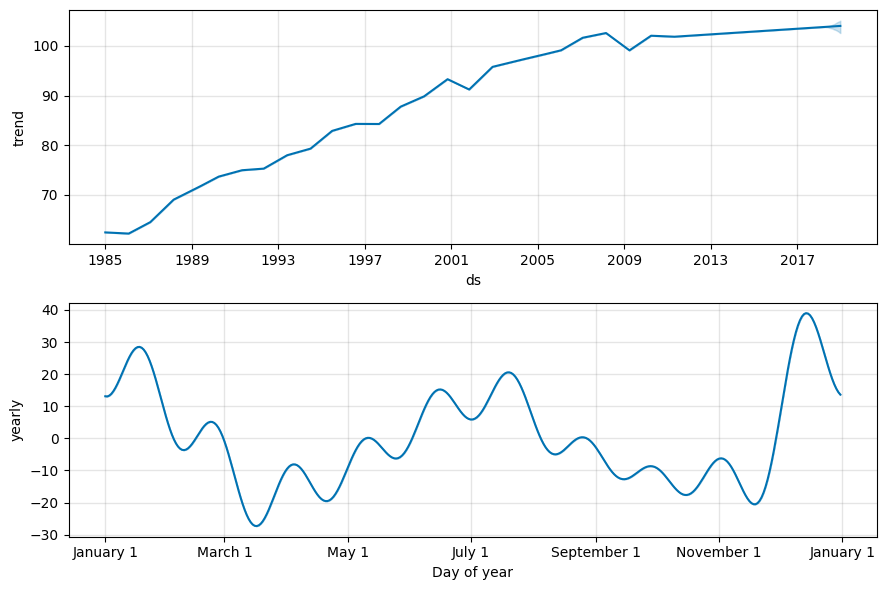

In [116]:
model.plot_components(forecasts)

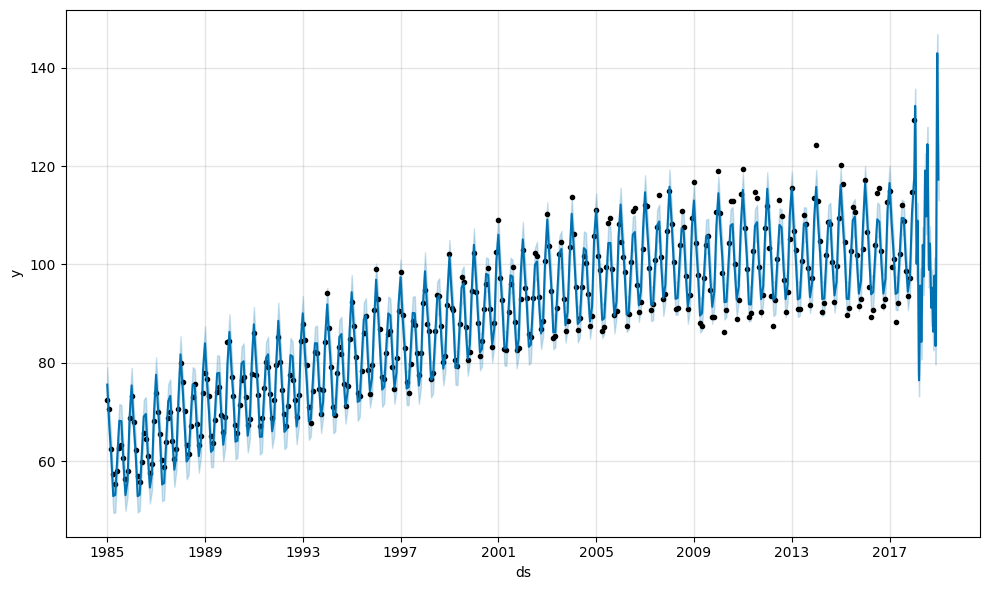

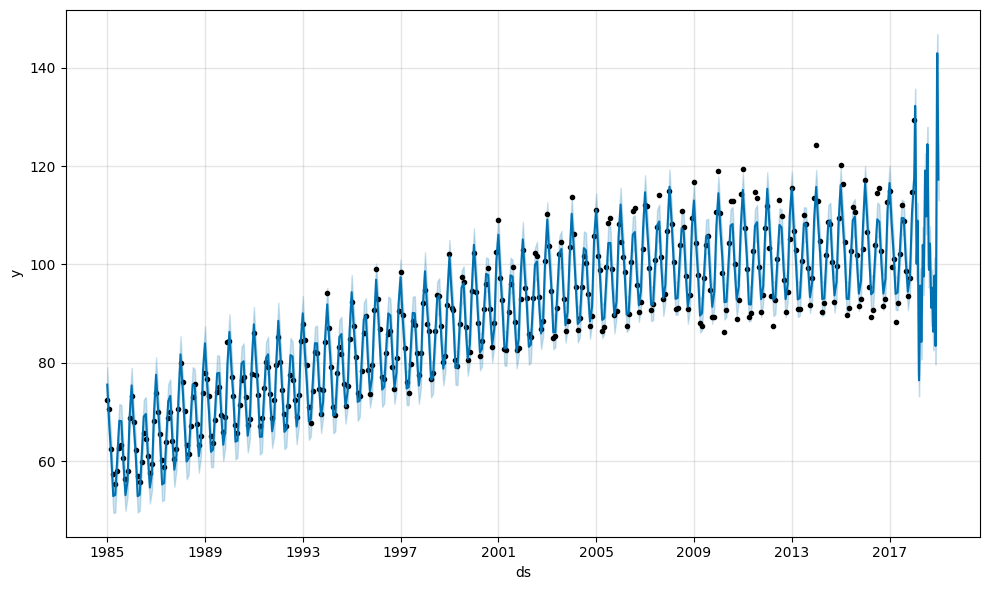

In [117]:
model.plot(forecasts)